In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Rent Data.xlsx')

In [3]:
df

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


In [4]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [5]:
import matplotlib.pyplot as plt

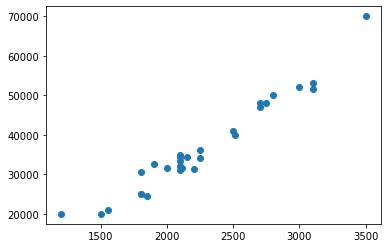

In [6]:
plt.scatter(df['area'], df['rent'])

In [7]:
df.area.mean()

2259.310344827586

In [8]:
df.rent.mean()

36702.06896551724

Text(0.5, 1.0, 'Rent-area Table')

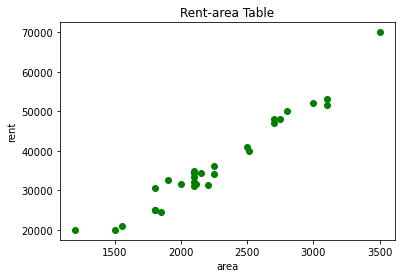

In [9]:
plt.scatter(df['area'], df['rent'], color = 'green')
plt.xlabel('area'); plt.ylabel('rent')
plt.title('Rent-area Table')

In [10]:
x = df[['area']]
y = df['rent']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=.30)

In [13]:
xtrain.shape

(20, 1)

In [14]:
xtest.shape

(9, 1)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [18]:
m = lr.coef_; c = lr.intercept_

In [19]:
y = m*1850 + c; y

array([26875.59001534])

In [20]:
lr.predict([[1850]])

array([26875.59001534])

In [21]:
print(m);print(c)

[22.61158121]
-14955.835222648922


In [22]:
lr.score(xtest,ytest)

0.8936823396108187

In [23]:
df['predicted_rent'] = lr.predict(x);df.head()

,area,rent,predicted_rent
0,2000,31500,30267.327197
1,2100,35000,32528.485318
2,2500,41050,41573.117802
3,2250,36100,35920.222499
4,3000,52100,52878.908407


In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mse = mean_squared_error(ytest, lr.predict(xtest));mse

10625859.50222985

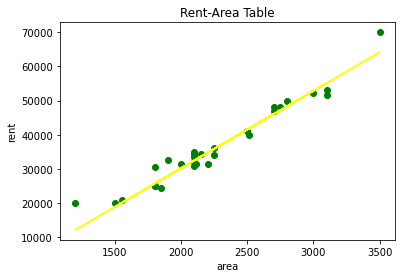

In [26]:
plt.scatter(df['area'], df['rent'],color='green')
plt.xlabel('area')
plt.ylabel('rent')
plt.title('Rent-Area Table')
plt.plot(df.area , df['predicted_rent'],color='yellow')

In [27]:
import pickle as pk

In [28]:
pk.dump(lr, open('Rent_pickle', 'wb'))

In [29]:
model = pk.load(open('Rent_pickle', 'rb'))

In [30]:
model.predict([[2000]])

array([30267.3271968])